In [1]:
import pandas as pd

In [2]:
cr_loan=pd.read_csv('/content/cr_loan2 (1).csv')

In [7]:
cr_loan.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [9]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
import matplotlib.pyplot as plt


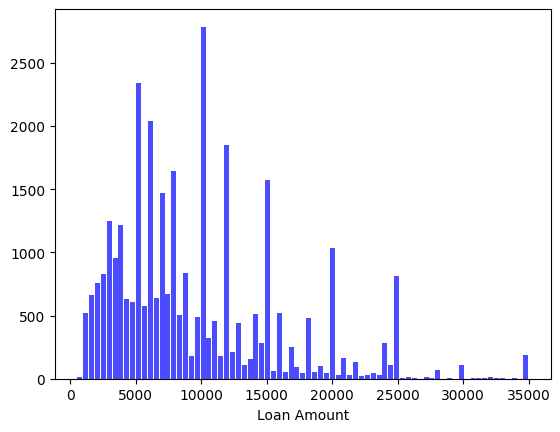

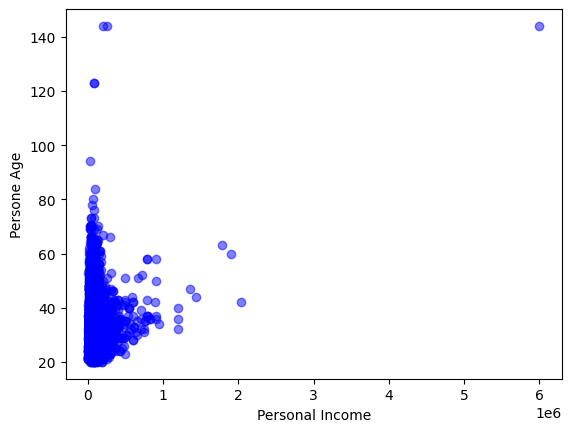

In [10]:
## Explore the credit data

# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)

plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581
loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                  

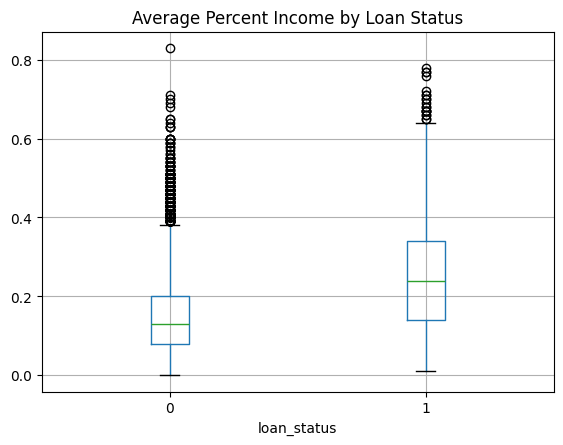

In [11]:
## Crosstab and pivot tables

# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'], [cr_loan['loan_status'], cr_loan['loan_grade']]))

# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [12]:
## Finding outliers with cross tables

# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))


# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index



# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)


# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'], cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))



person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0
                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


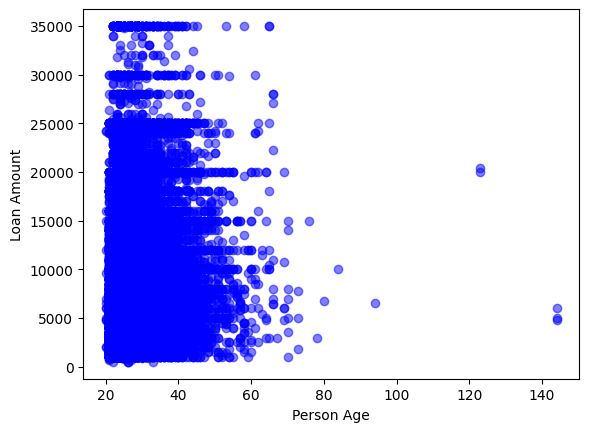

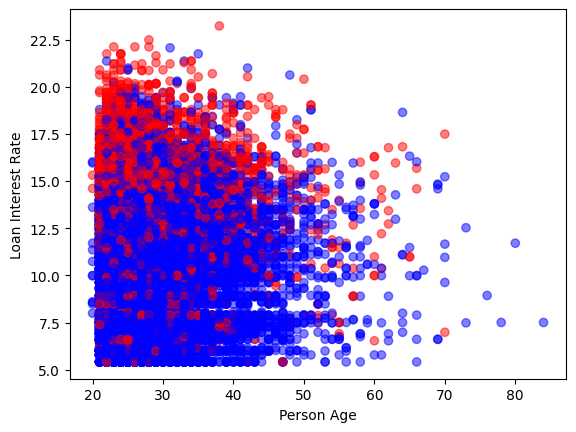

In [14]:
## Visualizing credit outliers

# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'],
            cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

import matplotlib

# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

<ipython-input-15-8cceea70b422>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)


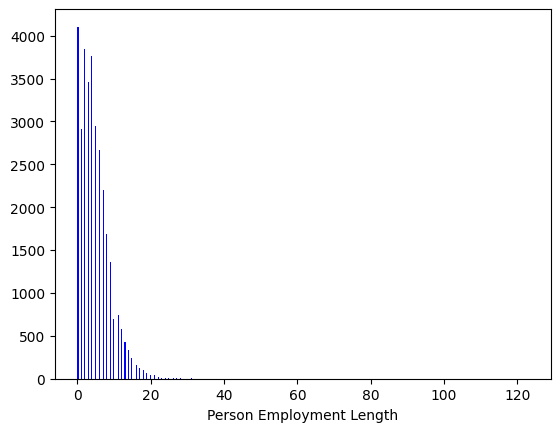

In [15]:
## Replacing missing credit data

# Print a null value column array
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [16]:
## Removing missing data

# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


In [17]:
## Missing data intuition

cr_loan['person_home_ownership'].value_counts(dropna=False)

# Replace the data with the value Other.

,count
person_home_ownership,
RENT,16446
MORTGAGE,13444
OWN,2584
OTHER,107


In [19]:
## Logistic regression basics
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45867803]


In [20]:
## Multivariate logistic regression

# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate', 'person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)


[-4.22530968]


In [43]:
## Creating training and test sets

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length', 'person_income', 'loan_amnt']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)


[[ 2.64347681e-01 -2.36912229e-02 -3.44444447e-05  1.06585402e-04]]


In [44]:
## Changing coefficients

# Create X1_train and X2_train with different subsets of columns
X1_train = X_train[['loan_int_rate']]
X2_train = X_train[['loan_int_rate', 'person_emp_length']]

# Print the first five rows of each training set
print(X1_train.head())
print(X2_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

       loan_int_rate
25231           7.66
25262          11.99
21498          13.48
1774           13.49
11441           6.03
       loan_int_rate  person_emp_length
25231           7.66               13.0
25262          11.99                2.0
21498          13.48                6.0
1774           13.49                2.0
11441           6.03                7.0
[[0.26049247]]
[[ 0.26054204 -0.04763934]]


In [45]:
## One-hot encoding credit data

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

# If you've ever seen a credit scorecard, the column_name_value
# format should look familiar. If you haven't seen one, look up
# some pictures during your next break!

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [46]:
## Predicting probability of default

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.182942
1            0      0.154842
2            0      0.020204
3            0      0.353736
4            0      0.479835


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
## Default classification reporting
from sklearn.metrics import classification_report

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > .5 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

loan_status
0    10551
1     1235
Name: count, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.84      0.96      0.90      9194
     Default       0.72      0.34      0.46      2592

    accuracy                           0.83     11786
   macro avg       0.78      0.65      0.68     11786
weighted avg       0.81      0.83      0.80     11786



In [48]:
## Selecting report metrics
from sklearn.metrics import precision_recall_fscore_support

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))


# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test, preds_df['loan_status']))


# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test, preds_df['loan_status'])[:2])

              precision    recall  f1-score   support

 Non-Default       0.84      0.96      0.90      9194
     Default       0.72      0.34      0.46      2592

    accuracy                           0.83     11786
   macro avg       0.78      0.65      0.68     11786
weighted avg       0.81      0.83      0.80     11786

(array([0.83830917, 0.71740891]), array([0.96204046, 0.34182099]), array([0.89592302, 0.46302587]), array([9194, 2592]))
(array([0.83830917, 0.71740891]), array([0.96204046, 0.34182099]))


0.8256405905311386


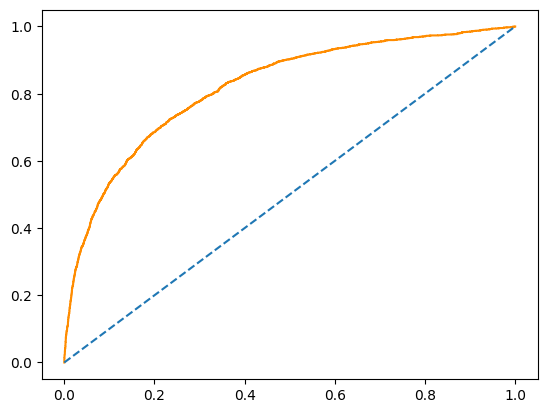

In [49]:
## Visually scoring credit models
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

## ROC AUC PLOT

# what the ROC chart shows us is the tradeoff between
# all values of our false positive rate (fallout) and true positive rate (sensitivity).

In [50]:
## Thresholds and confusion matrices
from sklearn.metrics import confusion_matrix

# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test, preds_df['loan_status']))

# <script.py> output:
#     [[9023  175]
#      [2152  434]]

# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > .4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test, preds_df['loan_status']))

# <script.py> output:
#     [[8476  722]
#      [1386 1200]]

[[8845  349]
 [1706  886]]
[[8401  793]
 [1302 1290]]


In [51]:
## How thresholds affect performance
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

# Create a dataframe for the probabilities of default and the true loan status
test_pred_df = pd.DataFrame({'prob_default': preds[:, 1], 'true_loan_status': y_test['loan_status'], 'loan_amnt': X_test['loan_amnt']})


# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > .4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test, preds_df['loan_status'])[1][1]

# Calculate the average loan amount
avg_loan_amnt = test_pred_df['loan_amnt'].mean()

# Calculate the estimated impact of the new default recall rate
print(avg_loan_amnt * num_defaults * (1 - default_recall))

9966128.199697265


In [57]:
## Threshold selection

plt.plot(thresh, def_recalls)
plt.plot(thresh, nondef_recalls)
plt.plot(thresh, accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()


NameError: name 'thresh' is not defined

In [59]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.034130
1            0      0.035046
2            0      0.004114
3            0      0.038239
4            0      0.425722


In [61]:

# Print the first five rows of the portfolio data frame
print(portfolio.head())

# Create expected loss columns for each model using the formula
portfolio['gbt_expected_loss'] = portfolio['gbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['lr_expected_loss'] = portfolio['lr_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio['gbt_expected_loss']))


#    LR expected loss:  5596776.980
#    GBT expected loss:  5447712.942

NameError: name 'portfolio' is not defined

In [63]:
## Assessing gradient boosted trees

# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[0 0 0 ... 1 0 0]
              precision    recall  f1-score   support

 Non-Default       0.89      0.94      0.92      9194
     Default       0.75      0.60      0.67      2592

    accuracy                           0.87     11786
   macro avg       0.82      0.77      0.79     11786
weighted avg       0.86      0.87      0.86     11786



In [64]:
## Column importance and default prediction

# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))


{'loan_int_rate': 1057.0, 'person_emp_length': 644.0, 'person_income': 1312.0, 'loan_amnt': 1028.0}


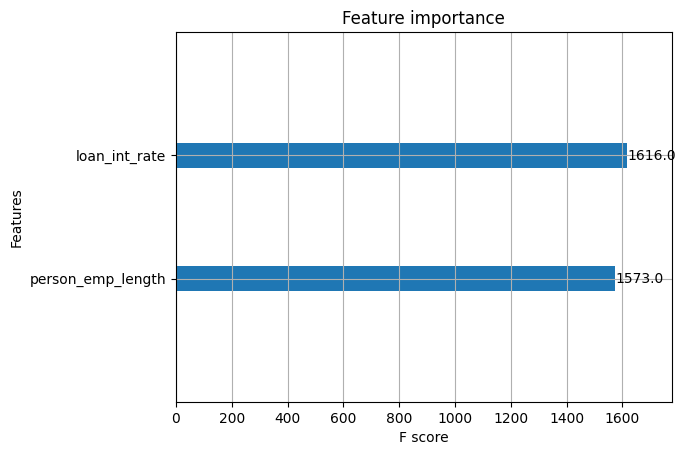

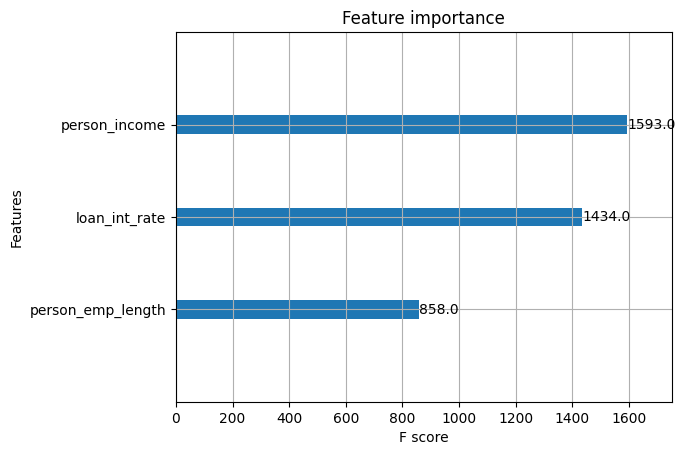

In [66]:
## Visualizing column importance

# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X2_train, np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()


# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()



In [67]:
## Column selection and model performance

# Predict the loan_status using each model
gbt_preds = gbt.predict(X_test)
gbt2_preds = gbt2.predict(X2_test)

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

# Print the classification report of the second model
print(classification_report(y_test, gbt2_preds, target_names=target_names))

NameError: name 'gbt' is not defined

In [70]:
## Cross validating credit models

# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.770793       0.010896       0.770588      0.013509
1        0.802045       0.013589       0.801562      0.015698
2        0.820032       0.001398       0.817523      0.008776
3        0.825767       0.001978       0.821889      0.008105
4        0.829645       0.001400       0.824786      0.007742


   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.770793       0.010896       0.770588      0.013509
1        0.802045       0.013589       0.801562      0.015698
2        0.820032       0.001398       0.817523      0.008776
3        0.825767       0.001978       0.821889      0.008105
4        0.829645       0.001400       0.824786      0.007742
0.88


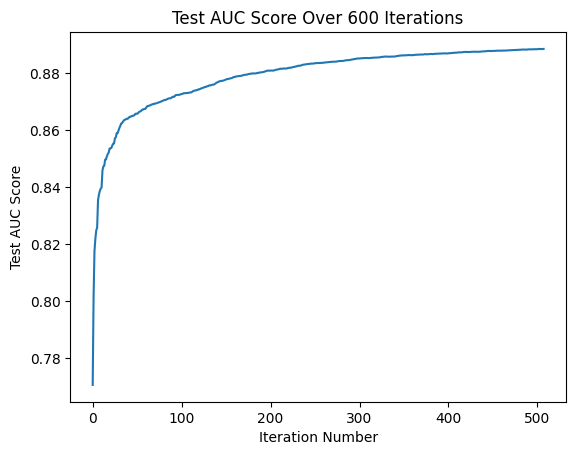

In [72]:
## Limits to cross-validation testing

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Perform cross-validation with a larger number of boosting rounds
cv_results_big = xgb.cv(params, DTrain, num_boost_round=600, nfold=n_folds,
                        early_stopping_rounds=early_stopping)


# Print the first five rows of the CV results data frame
print(cv_results_big.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean']).round(2))

# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [74]:
## Cross-validation scoring
from sklearn.model_selection import cross_val_score

# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = .1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                               cv_scores.std() * 2))

[0.86628959 0.86425339 0.87013575 0.86739081]
Average accuracy: 0.87 (+/- 0.00)


In [76]:
## Undersampling training data

# Concatenate X_train and y_train
X_y_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(len(defaults))

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())


# <script.py> output:
#     1    3877
#     0    3877
#     Name: loan_status, dtype: int64

loan_status
0    3872
1    3872
Name: count, dtype: int64


In [78]:
## Undersampled tree performance
# Assuming X_y_train_under contains the undersampled data

# Separate features and labels from the undersampled data
X_train_under = X_y_train_under.drop('loan_status', axis=1)
y_train_under = X_y_train_under['loan_status']


# Train a new Gradient Boosted Tree model on the undersampled data
clf_gbt_under = xgb.XGBClassifier().fit(X_train_under, y_train_under)

# Predict the labels for loan status using the undersampled model
gbt2_preds = clf_gbt_under.predict(X_test)


# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))
print(classification_report(y_test, gbt2_preds, target_names=target_names))


print(confusion_matrix(y_test, gbt_preds))
print(confusion_matrix(y_test, gbt2_preds))




# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_test, gbt_preds))
print(roc_auc_score(y_test, gbt2_preds))



              precision    recall  f1-score   support

 Non-Default       0.89      0.94      0.92      9194
     Default       0.75      0.60      0.67      2592

    accuracy                           0.87     11786
   macro avg       0.82      0.77      0.79     11786
weighted avg       0.86      0.87      0.86     11786

              precision    recall  f1-score   support

 Non-Default       0.94      0.84      0.88      9194
     Default       0.58      0.80      0.68      2592

    accuracy                           0.83     11786
   macro avg       0.76      0.82      0.78     11786
weighted avg       0.86      0.83      0.84     11786

[[8681  513]
 [1028 1564]]
[[7700 1494]
 [ 508 2084]]
0.7737989013231925
0.8207575324218425


In [80]:
## Model Evaluation and Implementation

# Create dataframes for the predicted loan status for LR and GBT
preds_df_lr = pd.DataFrame(clf_logistic.predict_proba(X_test)[:, 1], columns=['prob_default'])
preds_df_lr['loan_status'] = preds_df_lr['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

preds_df_gbt = pd.DataFrame(clf_gbt.predict_proba(X_test)[:, 1], columns=['prob_default'])
preds_df_gbt['loan_status'] = preds_df_gbt['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)


# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test, preds_df_lr['loan_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test, preds_df_gbt['loan_status'], average = 'macro')[2])

              precision    recall  f1-score   support

 Non-Default       0.84      0.96      0.90      9194
     Default       0.72      0.34      0.46      2592

    accuracy                           0.83     11786
   macro avg       0.78      0.65      0.68     11786
weighted avg       0.81      0.83      0.80     11786

              precision    recall  f1-score   support

 Non-Default       0.89      0.94      0.92      9194
     Default       0.75      0.60      0.67      2592

    accuracy                           0.87     11786
   macro avg       0.82      0.77      0.79     11786
weighted avg       0.86      0.87      0.86     11786

0.6794744436562249
0.7942146436474102


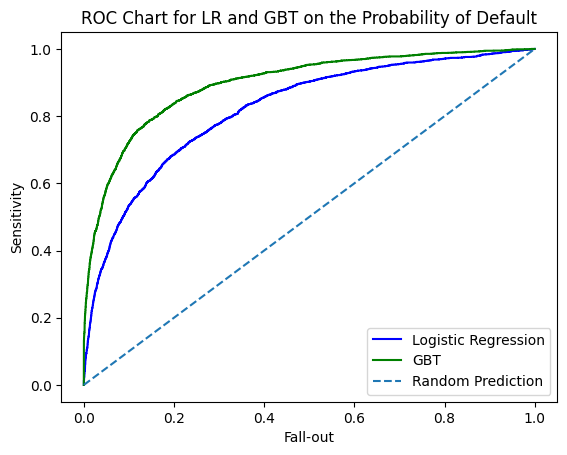

Logistic Regression AUC Score: 0.82
Gradient Boosted Tree AUC Score: 0.90


In [86]:
## Comparing with ROCs

# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, preds_df_lr['prob_default'])
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, preds_df_gbt['prob_default'])

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()


# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, preds_df_lr['prob_default']))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, preds_df_gbt['prob_default']))

# <script.py> output:
#     Logistic Regression AUC Score: 0.76
#     Gradient Boosted Tree AUC Score: 0.94

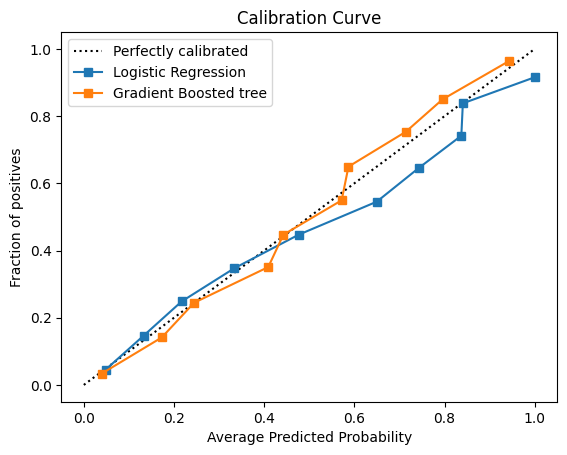

In [90]:
## Calibration curves
from sklearn.calibration import calibration_curve

# Calculate calibration curve for logistic regression
mean_pred_val_lr, frac_of_pos_lr = calibration_curve(y_test, preds_df_lr['prob_default'], n_bins=10)

# Calculate calibration curve for gradient boosted tree
mean_pred_val_gbt, frac_of_pos_gbt = calibration_curve(y_test, preds_df_gbt['prob_default'], n_bins=10)


# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % "Gradient Boosted tree")
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [91]:
## Acceptance rates

# Check the statistics of the probabilities of default
print(test_pred_df['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], .85)

# Apply acceptance rate threshold
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(test_pred_df['pred_loan_status'].count())

count    1.178600e+04
mean     2.155503e-01
std      1.908913e-01
min      1.955878e-90
25%      6.244455e-02
50%      1.570717e-01
75%      3.242615e-01
max      9.256706e-01
Name: prob_default, dtype: float64
11786


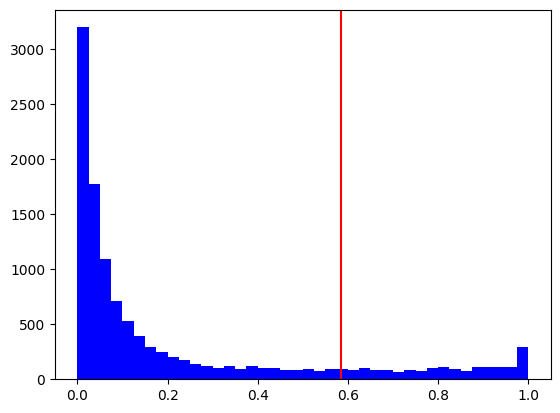

In [93]:
## Visualizing quantiles of acceptance

# Plot the predicted probabilities of default
plt.hist(preds_df_gbt['prob_default'], color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(preds_df_gbt['prob_default'], .85)

# Add a reference line to the plot for the threshold
plt.axvline(x =threshold, color = 'red')
plt.show()

In [94]:
## Bad rates

# Print the top 5 rows of the new data frame
print(test_pred_df.head())

# Create a subset of only accepted loans
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Calculate the bad rate
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count())



       prob_default  true_loan_status  loan_amnt  loss_given_default  \
30015      0.182942                 0       9000                 1.0   
22648      0.154842                 0      11000                 1.0   
9634       0.020204                 0       3700                 1.0   
3455       0.353736                 0      10800                 1.0   
16426      0.479835                 0       7500                 1.0   

       expected_loss  pred_loan_status  
30015    1646.473806                 0  
22648    1703.265614                 0  
9634       74.754093                 0  
3455     3820.349855                 0  
16426    3598.759324                 1  
0.14354162507486523


In [96]:
## Acceptance rate impact

# Print the statistics of the loan amount column
print(test_pred_df['loan_amnt'].describe())

# Store the average loan amount
avg_loan = np.mean(test_pred_df['loan_amnt'])

# Set the formatting for currency, and print the cross tab
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(test_pred_df['true_loan_status'],
                 test_pred_df['pred_loan_status']).apply(lambda x: x * avg_loan, axis = 0))

count   $11,786.00
mean     $9,524.92
std      $6,219.27
min        $500.00
25%      $5,000.00
50%      $8,000.00
75%     $12,000.00
max     $35,000.00
Name: loan_amnt, dtype: float64
pred_loan_status              0              1
true_loan_status                              
0                $81,723,790.22  $5,848,299.21
1                $13,696,831.04 $10,991,754.54


In [100]:
## Making the strategy table

accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
                0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

# Create lists to store thresholds and bad rates and estimated values
thresholds = []
bad_rates = []
estimated_values = []

# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:

    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df_gbt['prob_default'], \
                         rate).round(3)

    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(preds_df_gbt['prob_default'],\
                                  rate).round(3))

    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default']\
                                        .apply(lambda x: 1 if x > thresh else 0)

    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status']) /\
                            len(accepted_loans['true_loan_status'])).round(3))

    # Calculate the estimated value for this acceptance rate
    # Assuming estimated value is total loan amount of accepted loans minus their expected loss
    total_accepted_loan_amount = np.sum(accepted_loans['loan_amnt'])
    total_expected_loss_accepted = np.sum(accepted_loans['expected_loss'])
    estimated_value = total_accepted_loan_amount - total_expected_loss_accepted
    estimated_values.append(estimated_value.round(2))


# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, estimated_values),
                        columns = ['Acceptance Rate','Threshold','Bad Rate', 'Estimated Value'])

# Print the entire table
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate  Estimated Value
0             $1.00      $1.00     $0.22   $84,844,719.24
1             $0.95      $0.91     $0.22   $84,834,933.23
2             $0.90      $0.76     $0.21   $84,425,102.46
3             $0.85      $0.58     $0.18   $81,759,995.51
4             $0.80      $0.42     $0.14   $75,184,251.64
5             $0.75      $0.29     $0.10   $65,554,209.42
6             $0.70      $0.20     $0.08   $54,597,774.81
7             $0.65      $0.15     $0.06   $45,435,328.35
8             $0.60      $0.11     $0.05   $38,412,768.59
9             $0.55      $0.09     $0.05   $32,513,126.66
10            $0.50      $0.07     $0.04   $27,543,849.07
11            $0.45      $0.06     $0.04   $23,322,818.94
12            $0.40      $0.05     $0.04   $19,364,467.99
13            $0.35      $0.04     $0.04   $16,076,907.48
14            $0.30      $0.03     $0.04   $13,438,402.75
15            $0.25      $0.02     $0.04   $10,678,372.74
16            

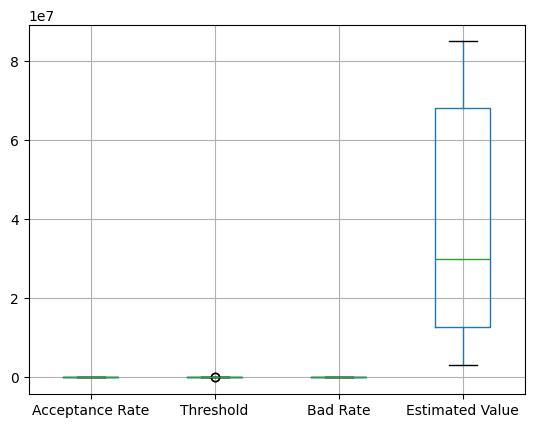

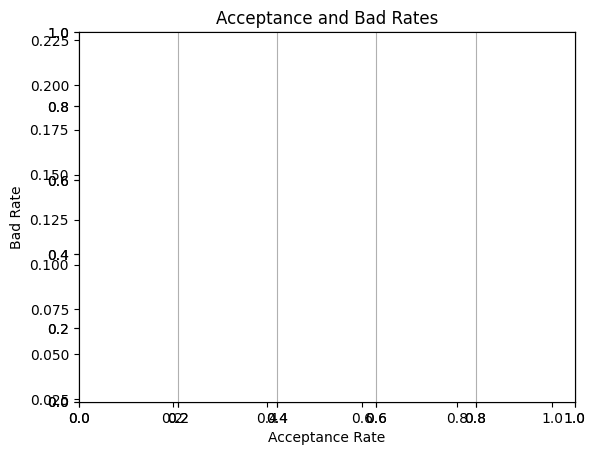

In [101]:
## Visualizing the strategy

# Visualize the distributions in the strategy table with a boxplot
strat_df.boxplot()
plt.show()
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'],
         strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

In [102]:
## Estimated value profiling

# Print the row with the max estimated value
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])



   Acceptance Rate  Threshold  Bad Rate  Estimated Value
0            $1.00      $1.00     $0.22   $84,844,719.24


In [103]:
## Total expected loss

# Print the first five rows of the data frame
print(test_pred_df.head())

# Add 'loss_given_default' column to test_pred_df with placeholder values
test_pred_df['loss_given_default'] = 1.0 # **Replace 1.0 with your actual loss_given_default values**

# Calculate the bank's expected loss and assign it to a new column
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loss_given_default'] * test_pred_df['loan_amnt']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))



       prob_default  true_loan_status  loan_amnt  loss_given_default  \
30015         $0.18                 0       9000               $1.00   
22648         $0.15                 0      11000               $1.00   
9634          $0.02                 0       3700               $1.00   
3455          $0.35                 0      10800               $1.00   
16426         $0.48                 0       7500               $1.00   

       expected_loss  pred_loan_status  
30015      $1,646.47                 1  
22648      $1,703.27                 1  
9634          $74.75                 1  
3455       $3,820.35                 1  
16426      $3,598.76                 1  
Total expected loss:  $27,415,955.76


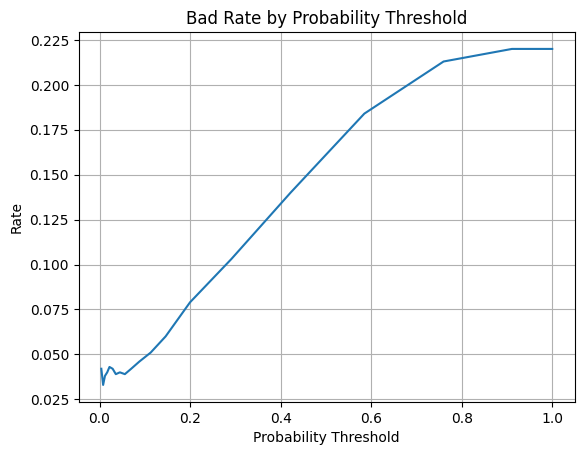

In [104]:
## Threshold selection

plt.plot(strat_df['Threshold'], strat_df['Bad Rate'], label="Bad Rate")
plt.xlabel("Probability Threshold")
plt.ylabel("Rate")
plt.title("Bad Rate by Probability Threshold")
plt.grid(True)
plt.show()

# Create the portfolio DataFrame
portfolio = X_test.copy()
portfolio['true_loan_status'] = y_test
portfolio['lr_prob_default'] = clf_logistic.predict_proba(X_test)[:, 1]
portfolio['gbt_prob_default'] = clf_gbt.predict_proba(X_test)[:, 1]
portfolio['loss_given_default'] = 1.0 # Replace 1.0 with your actual loss_given_default values

print(portfolio.head())

In [69]:
# Define the parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'auc',           # Evaluation metric
    'eta': 0.1,                     # Learning rate
    'max_depth': 3,                 # Maximum depth of trees
    'subsample': 0.8,               # Fraction of samples used for fitting the individual base learners
    'colsample_bytree': 0.8,        # Fraction of features used for fitting the individual base learners
    'seed': 123                     # Random seed for reproducibility
}